In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

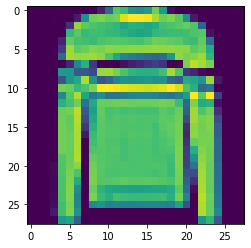

In [4]:
plt.imshow(X_train_full[5,:].reshape(28,28))

In [5]:
#creating a validation set 
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Building a neural network

In [7]:
#creates a single stack of layers connected sequentially
model = keras.models.Sequential()

In [8]:
#this is a Flatten layer. It converts the specified input shape into a (-1,1) instance. 
model.add(keras.layers.Flatten(input_shape = [28,28]))

In [9]:
#next we add the first hidden layer containing 300 neurons. It will use the Rectified Linear Unit Activation Function(ReLU). 
#This does not include bias terms 
model.add(keras.layers.Dense(300, activation = "relu"))

In [10]:
#next we add another hidden layer with 100 neurons in it
model.add(keras.layers.Dense(100, activation = "relu"))

In [11]:
#last we add in the output layer which has 10 neurons for the 10 different classes
model.add(keras.layers.Dense(10, activation = "softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
weights, biases = model.layers[1].get_weights()

In [15]:
weights.shape

(784, 300)

In [16]:
biases.shape

(300,)

The shape of the weight matrix is dependant on the number of inputs. This is why input_shape should be specified in keras.layers.Flatten. 

In [17]:
#using compile method to specify the loss function, optimizer to use and extra metrics to compute during training 
model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "sgd",
                metrics = ["accuracy"])

In [18]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
keras.utils.to_categorical(y_train_full)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
history = model.fit(X_train,y_train,epochs = 30, 
                    validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.9616 - accuracy: 0.6921 - val_loss: 0.5252 - val_accuracy: 0.8160
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4985 - accuracy: 0.8296 - val_loss: 0.4900 - val_accuracy: 0.8310
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4514 - accuracy: 0.8441 - val_loss: 0.4408 - val_accuracy: 0.8490
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4185 - accuracy: 0.8521 - val_loss: 0.4436 - val_accuracy: 0.8422
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4050 - accuracy: 0.8572 - val_loss: 0.3768 - val_accuracy: 0.8736
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3796 - accuracy: 0.8656 - val_loss: 0.3696 - val_accuracy: 0.8738
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3700 - accuracy: 0.8712 - val_loss: 0.3941 - val_accuracy

For skewed datasets with some classes being overrepresented while others are underrepresented, it would be useful to set the class_weight argument in the fit method. 

For cases where we want instances to be given different weights, like in the case of outliers (NBA dataset), we need to use sample_weight. For sample_weight we can either pass a flat Numpy array with the same length as the input samples. 

In [21]:
import pandas as pd
df = pd.DataFrame(data = history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.709187,0.765364,0.525223,0.8160
1,0.487777,0.829818,0.489953,0.8310
2,0.440157,0.845800,0.440810,0.8490
3,0.413194,0.854418,0.443561,0.8422
4,0.393108,0.861945,0.376787,0.8736
5,0.377807,0.866982,0.369634,0.8738
6,0.363643,0.872164,0.394074,0.8592
7,0.352827,0.874709,0.350002,0.8780
8,0.341609,0.878636,0.353143,0.8782
9,0.332009,0.881345,0.342113,0.8798


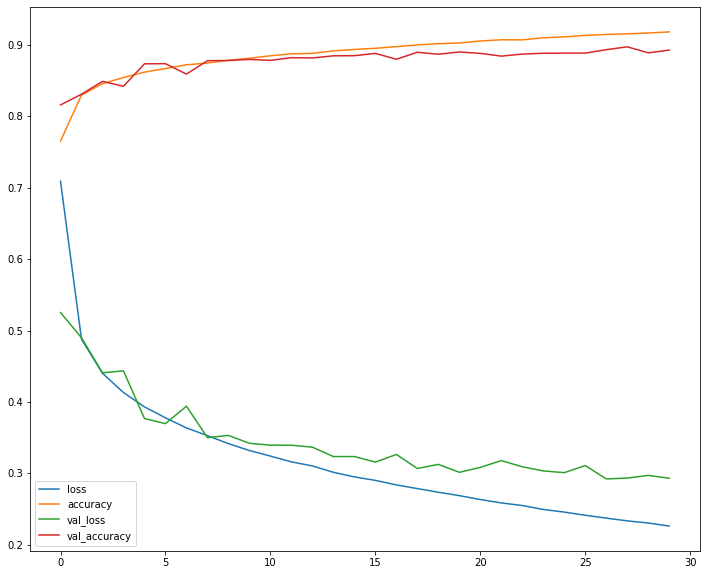

In [22]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (12,10))
ax.plot(df.index.values.tolist(),df["loss"], label = "loss")
ax.plot(df.index.values.tolist(),df["accuracy"], label = "accuracy")
ax.plot(df.index.values.tolist(),df["val_loss"], label = "val_loss")
ax.plot(df.index.values.tolist(),df["val_accuracy"], label = "val_accuracy")
ax.legend()

In [23]:
model.evaluate(X_test, y_test, return_dict=True)

313/313 [==============================] - 2s 5ms/step - loss: 63.5705 - accuracy: 0.8393


{'loss': 63.57048034667969, 'accuracy': 0.8392999768257141}

Making predictions using a model

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
#y_proba.round(2)

In [25]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
model.predict_classes(X_new)

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

<h2> Building a Regression MLP using the Sequential API </h2> 

In [27]:
#using a regression neural network
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full_reg,x_test_reg,y_train_full_reg,y_test_reg = train_test_split(housing.data, housing.target)


x_train_reg, x_valid_reg, y_train_reg, y_valid_reg = train_test_split(x_train_full_reg, y_train_full_reg)

In [28]:
scaler = StandardScaler()
#notice that we fit_transform on the train set and transform on the validation and test sets
x_train_reg_scaled = scaler.fit_transform(x_train_reg)
x_valid_reg_scaled = scaler.transform(x_valid_reg)
x_test_reg_scaled = scaler.transform(x_test_reg)

In [29]:
model_reg = keras.models.Sequential()

In [30]:
#adding input layer
model_reg.add(keras.layers.InputLayer(input_shape = x_train_reg_scaled.shape[1:]))
model_reg.add(keras.layers.Dense(30, activation = "relu"))
#the output neuron has no activation function to it
model_reg.add(keras.layers.Dense(1))

In [31]:
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [32]:
#no need to always add the input_layer. We can always user keras.layers.Dense
model_test = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=x_train_reg_scaled.shape[1:]),
keras.layers.Dense(1)
])

In [33]:
x_train_reg_scaled.shape[1:]

(8,)

In [34]:
model_test.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_reg.compile(loss = "mean_squared_error", optimizer = "sgd", metrics=tf.keras.metrics.MeanSquaredError())

In [36]:
""" for epoch in range(n_epochs):
for i in range(m):
random_index = np.random.randint(m)
xi = X_b[random_index:random_index+1]
yi = y[random_index:random_index+1]
gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
eta = learning_schedule(epoch * m + i)
theta = theta - eta * gradients """

#The above code shows how epochs work. For each epoch, It selects batches of instances and then applies the training for a stochastic instance in each batch.

history = model_reg.fit(x_train_reg_scaled, y_train_reg, epochs = 20, validation_data = (x_valid_reg_scaled, y_valid_reg))


Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.2489 - mean_squared_error: 1.2489 - val_loss: 0.5491 - val_mean_squared_error: 0.5491
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5476 - mean_squared_error: 0.5476 - val_loss: 0.4789 - val_mean_squared_error: 0.4789
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5193 - mean_squared_error: 0.5193 - val_loss: 0.4721 - val_mean_squared_error: 0.4721
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4793 - mean_squared_error: 0.4793 - val_loss: 0.4550 - val_mean_squared_error: 0.4550
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4658 - mean_squared_error: 0.4658 - val_loss: 0.4349 - val_mean_squared_error: 0.4349
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4706 - mean_squared_error: 0.4706 - val_loss: 0.4236 - val_mean_squared_error: 0.4236
Epoch 7/20
363/363 [========

In [37]:
history.history

{'loss': [0.8256701231002808,
  0.5374156832695007,
  0.6263853311538696,
  0.4809531569480896,
  0.46304014325141907,
  0.4512423276901245,
  0.4423277676105499,
  0.43247637152671814,
  0.4257669150829315,
  0.41985100507736206,
  0.4139631986618042,
  0.41413140296936035,
  0.40843451023101807,
  0.4060514569282532,
  0.4019498825073242,
  0.3968123495578766,
  0.3917056918144226,
  0.3904537856578827,
  0.38608789443969727,
  0.3925602436065674],
 'mean_squared_error': [0.8256701231002808,
  0.5374156832695007,
  0.6263853311538696,
  0.4809531569480896,
  0.46304014325141907,
  0.4512423276901245,
  0.4423277676105499,
  0.43247637152671814,
  0.4257669150829315,
  0.41985100507736206,
  0.4139631986618042,
  0.41413140296936035,
  0.40843451023101807,
  0.4060514569282532,
  0.4019498825073242,
  0.3968123495578766,
  0.3917056918144226,
  0.3904537856578827,
  0.38608789443969727,
  0.3925602436065674],
 'val_loss': [0.549138069152832,
  0.47892528772354126,
  0.4721052944660187

In [38]:
model_test.compile(loss = "mean_squared_error", optimizer = "sgd")

In [39]:

history = model_test.fit(x_train_reg_scaled, y_train_reg, epochs = 20, validation_data = (x_valid_reg_scaled, y_valid_reg))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.1715 - val_loss: 0.5089
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5202 - val_loss: 0.4597
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5242 - val_loss: 0.4456
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4916 - val_loss: 0.4345
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4477 - val_loss: 0.4313
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4526 - val_loss: 0.4218
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4346 - val_loss: 0.4239
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4542 - val_loss: 0.4085
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4113 - val_loss: 0.4136
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4295 - val_loss: 0.4061

<h3> Building complex models using the Functional API </h3> 

These are non sequential neural networks. This architecture allows a neural network to learn both deep patterns (using the deep path) and simple rules (through the short path)

In [40]:
#for functional APIS
#new layer = newlayerconfig(previous_layer)
#create an Input opbject
inputlayer = keras.layers.Input(shape = X_train.shape[1:])
#30 neuron dense layer using ReLU activation. Once created we call it like a function and pass in the input layer as a parameter
hidden1 = keras.layers.Dense(30, activation = "relu")(inputlayer)
#second hidden layer
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
#this concatenates the input and the output of the second layer
concat = keras.layers.concatenate([inputlayer,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [inputlayer], outputs = [output])

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 28, 30)       870         input_2[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 28, 30)       930         dense_7[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_2[0][0]                    
                                                                 dense_8[0][0]                

In [57]:
#sending a subset of features through the wide path and a different subset through the deep path
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat_2 = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat_2)
model = keras.models.Model(inputs = [input_A,input_B], outputs = [output])

In [58]:
#instead of passing a single input matrix, we need to input 2 different matrices. 
#using a regression neural network
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full_reg,x_test_reg,y_train_full_reg,y_test_reg = train_test_split(housing.data, housing.target)


x_train_reg, x_valid_reg, y_train_reg, y_valid_reg = train_test_split(x_train_full_reg, y_train_full_reg)
scaler = StandardScaler()
#notice that we fit_transform on the train set and transform on the validation and test sets
x_train_reg = scaler.fit_transform(x_train_reg)
x_valid_reg = scaler.transform(x_valid_reg)
x_test_reg= scaler.transform(x_test_reg)

model.compile(loss = "mse", optimizer = "sgd", metrics= tf.keras.metrics.MeanSquaredError())

X_train_A, X_train_B = x_train_reg[:,:5],x_train_reg[:,2:]
X_valid_A, X_valid_B = x_valid_reg[:,:5],x_valid_reg[:,2:]
X_test_A,X_test_B = x_test_reg[:,:5],x_test_reg[:,2:]
X_new_A,X_new_B = X_test_A[:3], X_test_B[:3]

model.fit((X_train_A,X_train_B),y_train_reg, epochs = 20, validation_data = ((X_valid_A, X_valid_B),y_valid_reg))

mse_test = model.evaluate((X_test_A,X_test_B),y_test_reg)

y_pred_test = model.predict((X_test_A, X_test_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.3103 - mean_squared_error: 1.3103 - val_loss: 0.5380 - val_mean_squared_error: 0.5380
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5206 - mean_squared_error: 0.5206 - val_loss: 0.4965 - val_mean_squared_error: 0.4965
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4770 - mean_squared_error: 0.4770 - val_loss: 0.4786 - val_mean_squared_error: 0.4786
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4868 - mean_squared_error: 0.4868 - val_loss: 0.4699 - val_mean_squared_error: 0.4699
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4416 - mean_squared_error: 0.4416 - val_loss: 0.4571 - val_mean_squared_error: 0.4571
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4486 - mean_squared_error: 0.4486 - val_loss: 0.4520 - val_mean_squared_error: 0.4520
Epoch 7/20
363/363 [========

In [59]:
y_pred_test

array([[1.73982  ],
       [1.6637926],
       [1.5934716],
       ...,
       [1.6762779],
       [1.1952459],
       [3.0343642]], dtype=float32)

<h3> There can be situations in which you want multiple outputs </h3> 

- Locating an object in a picture (regression to find coordinates and classification to classify image)

- Multiple independent tasks to perform based on the same data. Train one neural network per task is possible, but this is inefficient. Also training one neural network with mutltiple outputs for the entire set of tasks allows higher accuracy too. This is because the neural network can learn data useful across the tasks. 


In [64]:
#multioutput
input_A_multi = keras.layers.Input(shape = [5])
input_B_mutli = keras.layers.Input(shape = [6])
hidden1_multi = keras.layers.Dense(30, activation = 'relu')(input_B_mutli)
hidden2_multi = keras.layers.Dense(30, activation = 'relu')(hidden1_multi)
concat_multi = keras.layers.concatenate([input_A_multi, hidden2_multi])
output1 = keras.layers.Dense(1)(concat_multi)
output_aux = keras.layers.Dense(1)(hidden1_multi)
model_multi = keras.models.Model(inputs = [input_A_multi,input_B_mutli], outputs = [output1,output_aux])

For multi output neural networks, each output requires its own loss function. If one is passed, keras assumes its the same for all.

In [67]:
#usually different outputs will be given different weights
model_multi.compile(loss = ['mse','mse'],loss_weights = [0.9,0.1],optimizer = "sgd")


In [ ]:
#as we are using auxillary outputs, we will need to pass in auxillary output labels too